Ex. 1. Arătaţi echivalenţa dată în exemplul de la pagina 15 a cursului 3. Mai precis, arătaţi că dacă A, B şi C sunt variabile
aleatoare discrete, atunci

A,C independente ∣ B,
dacă şi numai dacă există două funcţii pozitive φA,B, φB,C şi o constantă de normalizare k > 0 astfel încât

P(A = xA, B = xB,C = xC) = 1/k φA,B(xA, xB)φB,C(xB, xC), ∀xA,xB,xC.

Încărcaţi argumentul fie în Markdown/Latex, fie ca foto la foia de lucru.

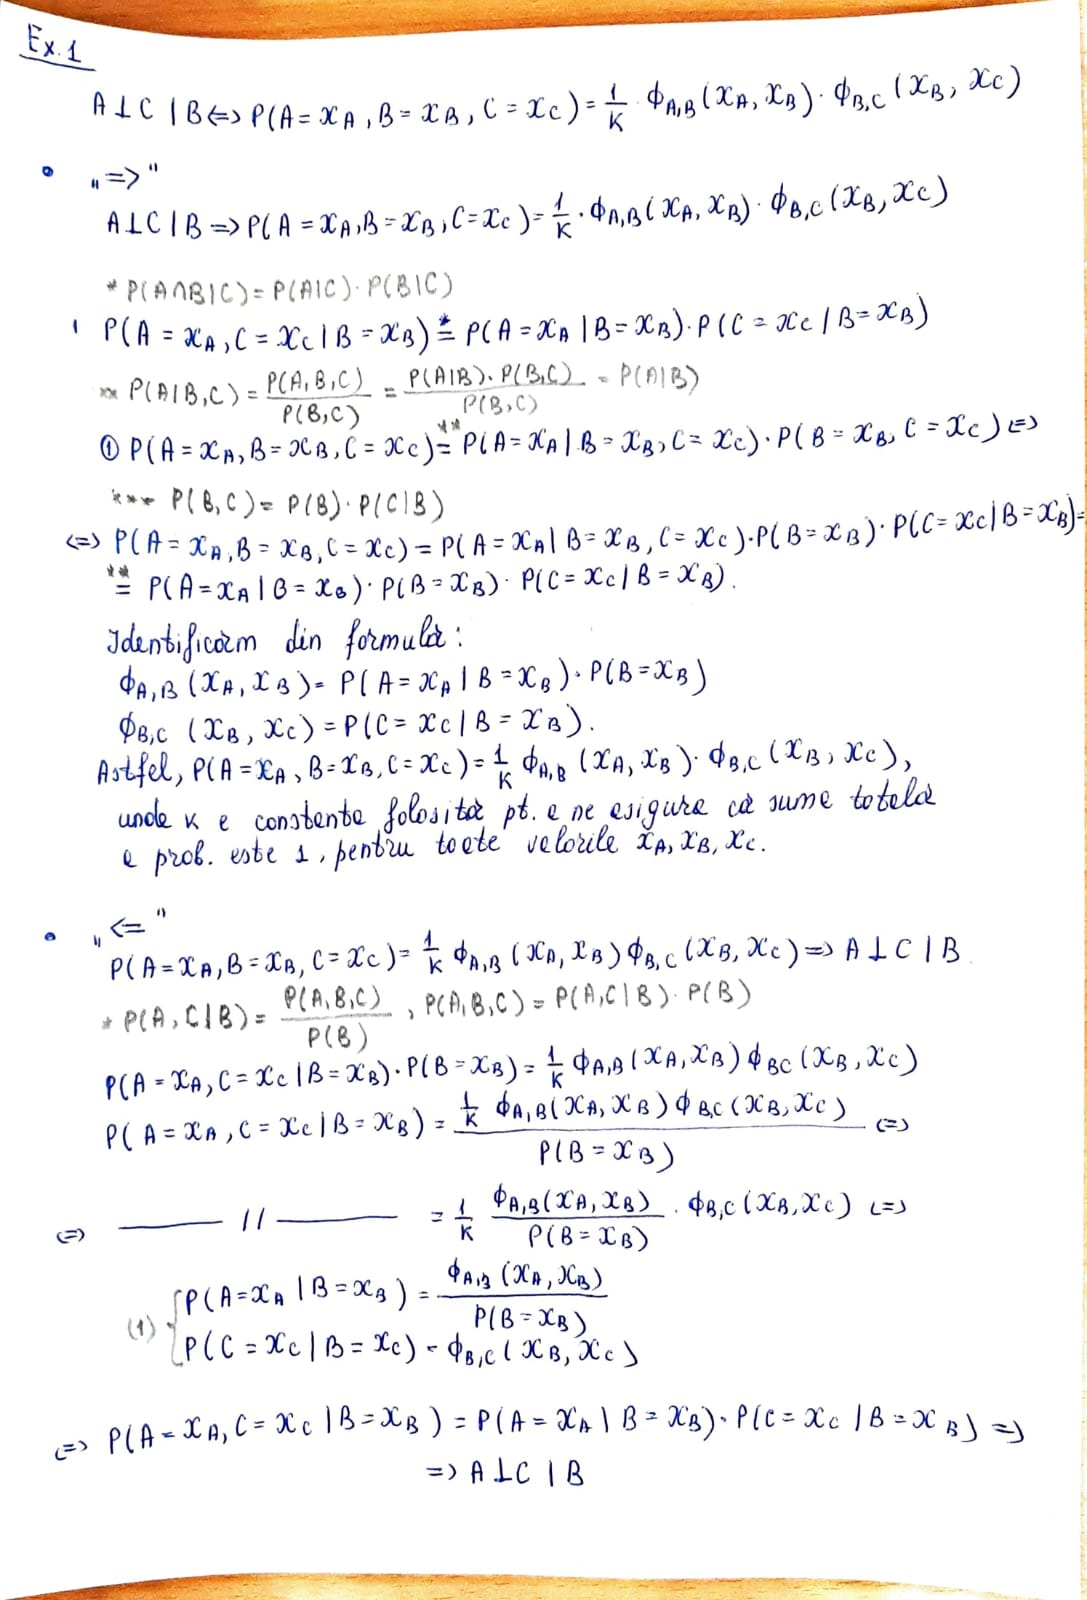

### Problemă

Considerăm o regiune în care observăm vremea la mai multe stații meteo, \( S_1, S_2, ..., S_n \). Fiecare stație raportează una dintre cele trei stări posibile:
- „Soare”
- „Ploaie”
- „Nori”

Scopul este de a prezice starea vremii la fiecare stație meteo, luând în considerare dependențele dintre stațiile adiacente. Vremea la o stație depinde direct de vremea la stațiile vecine.

Vom folosi o **rețea Markoviană** pentru a modela vremea la mai multe locații și vom inferea asupra vremii la o stație necunoscută, pe baza datelor de la vecini.

#### Date de intrare (introduse de către utilizator):
1. **Numărul de stații meteo**, \( n \).
2. **Muchiile corespunzătoare rețelei Markoviene**, adică vecinii fiecărei stații. Vom presupune că rețeaua este aciclică (nu există clici de dimensiune 3).
3. **Probabilitățile inițiale** pentru fiecare stație (exemplu: \( P(S) = 0.5 \), \( P(P) = 0.3 \), \( P(N) = 0.2 \)).

#### Matricea de potențial pentru fiecare pereche de stații vecine:


\begin{bmatrix}
0.7 & 0.2 & 0.1 \\
0.2 & 0.6 & 0.2 \\
0.1 & 0.3 & 0.6
\end{bmatrix}


Această matrice reprezintă potențialul de interacțiune între stările vremii la stații vecine: Soare (S), Ploaie (P) și Nori (N).

In [ ]:
!pip install pgmpy

In [ ]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import numpy as np

n = int(input("Introduceți numărul de stații: "))
edges = []

for i in range(n-1):
    edge = tuple(map(int, input(f"Introduceți muchia: ").split(',')))
    edges.append(edge)

markov_network = MarkovNetwork()

#nodurile pentru fiecare statie
stations = [f'Station_{i}' for i in range(n)]
markov_network.add_nodes_from(stations)

#muchiile intre statii
markov_network.add_edges_from([(f'Station_{edge[0]}', f'Station_{edge[1]}') for edge in edges])

#matricea de potential
potential_matrix = np.array([[0.7, 0.2, 0.1],
                             [0.2, 0.6, 0.2],
                             [0.1, 0.3, 0.6]])

for edge in edges:
    #un factor pt fiecare 2 statii vecine
    factor = DiscreteFactor(
        variables=[f'Station_{edge[0]}', f'Station_{edge[1]}'],
        cardinality=[3, 3],  #3 stari
        values=potential_matrix.flatten()
    )
    markov_network.add_factors(factor)

#probabilitatile initiale
initial_probs = {}
for i in range(n):
    probs = list(map(float, input(f"Introduceți probabilitățile pentru Station_{i} (Soare, Ploaie, Nori): ").split(',')))
    initial_probs[f'Station_{i}'] = probs

for station, probs in initial_probs.items():
    factor = DiscreteFactor(
        variables=[station],
        cardinality=[3],  # 3 stări
        values=probs
    )
    markov_network.add_factors(factor)

bp = BeliefPropagation(markov_network)
result = bp.map_query(variables=stations)

for station, weather in result.items():
    weather_str = ['Soare', 'Ploaie', 'Nori'][weather]
    print(f"Vremea prezisă la {station}: {weather_str}")

Introduceți numărul de stații: 3
Introduceți muchia: 0,1
Introduceți muchia: 1,2
Introduceți probabilitățile pentru Station_0 (Soare, Ploaie, Nori): 0.2, 0.4, 0.4
Introduceți probabilitățile pentru Station_1 (Soare, Ploaie, Nori): 0.6, 0.1, 0.3
Introduceți probabilitățile pentru Station_2 (Soare, Ploaie, Nori): 0.2, 0.1, 0.7
Vremea prezisă la Station_0: Nori
Vremea prezisă la Station_1: Nori
Vremea prezisă la Station_2: Nori



Ex 3
O problemă clasică care poate fi rezolvată folosind Markov Random Fields (MRF) este cea a denoising-ului imaginii, unde obiectivul este de a curăţa o imagine cu zgomot (noise) prin estimarea valorii fiecărui pixel, bazându-ne pe vecinii săi.

a) Imagine originală
Alegeţi o imagine de dimensiune foarte mică (de ordinul 5 × 5), care va fi utilizată drept imagine originală.
Această imagine poate fi creată în mod determinist (de exemplu, având un model regulat) sau aleatoriu (generând valori pentru pixeli la întâmplare).

b)
Alegeţi la întâmplare un număr de pixeli (în jur de 10%) pentru a fi modificaţi.
Creaţi astfel o versiune zgomotoasă a imaginii originale.


Considerăm un grid 2D, în care fiecare nod (pixel) este conectat la cei patru vecini direcţi (N, S, E, W). Energia totală
𝐸
(
𝑥
)
E(x) a unui grid poate fi descrisă prin două componente:

  * O componentă care penalizează discrepanțele între variabilele observate și cele latente (valorile pixelilor).
  * O componentă care penalizează discrepanțele între pixeli vecini, favorizând o imagine mai uniformă.
Funcţia de energie poate fi scrisă astfel:

𝐸
(
𝑥
)
=
∑
𝑖
𝜆
(
𝑥
𝑖
−
𝑦
𝑖
)
2
+
∑
(
𝑖
,
𝑗
)
(
𝑥
𝑖
−
𝑥
𝑗
)
2
,
E(x)=
i
∑
​
 λ(x
i
​
 −y
i
​
 )
2
 +
(i,j)
∑
​
 (x
i
​
 −x
j
​
 )
2
 ,
unde:

𝑥
𝑖
x
i
​
  este pixelul curat de estimat;
𝑦
𝑖
y
i
​
  este pixelul observat (cu zgomot);
𝜆
λ este un factor de regularizare care controlează influenţa zgomotului, ales de utilizator;
(
𝑖
,
𝑗
)
(i,j) reprezintă perechi de pixeli vecini.

c) Definirea unei reţele Markoviene
Folosind pgmpy, vom defini o rețea Markoviană care descrie contextul de mai sus. Această rețea va modela relațiile dintre pixeli și vecinii lor.

d) Estimarea imaginii originale (MAP)
Vom folosi metoda Maximum A Posteriori (MAP) pentru a estima imaginea originală pornind de la cea zgomotoasă. Vom folosi funcțiile BeliefPropagation și map_query din pgmpy, la fel ca în Exercițiul 2.

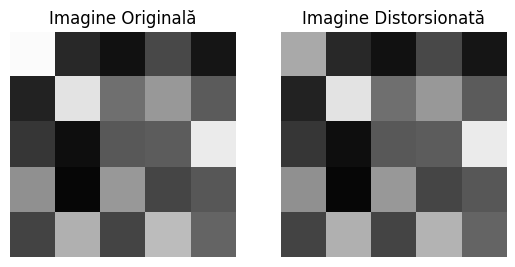

In [2]:
import numpy as np
import matplotlib.pyplot as plt

original_image = np.random.randint(0, 256, size=(5, 5))

distorted_image = original_image.copy()

num_pixels_to_modify = int(0.1 * original_image.size)

indices_to_modify = np.random.choice(original_image.size, num_pixels_to_modify, replace=False)

for idx in indices_to_modify:
    row, col = divmod(idx, original_image.shape[1])
    distorted_image[row, col] = np.random.randint(0, 256)

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.title("Imagine Originală")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(distorted_image, cmap='gray', vmin=0, vmax=255)
plt.title("Imagine Distorsionată")
plt.axis('off')

plt.show()


In [3]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation

model = MarkovNetwork()

for i in range(5):
    for j in range(5):
        # muchii pt vecini
        if i > 0:
            model.add_edge((i, j), (i-1, j))  #nord
        if i < 4:
            model.add_edge((i, j), (i+1, j))  #sud
        if j > 0:
            model.add_edge((i, j), (i, j-1))  #vest
        if j < 4:
            model.add_edge((i, j), (i, j+1))  #est


In [ ]:
lambda_reg = 0.5
factors = []

for i in range(5):
    for j in range(5):
        yi = distorted_image[i, j]

        observed_penalty = [np.exp(-lambda_reg * (xi - yi) ** 2) for xi in range(256)]

        factor = DiscreteFactor([(i, j)], [256], observed_penalty)
        factors.append(factor)
        model.add_factors(factor)

for i in range(5):
    for j in range(5):
        if i < 4:
            model.add_edge((i, j), (i + 1, j))
        if j < 4:
            model.add_edge((i, j), (i, j + 1))

for (i, j) in model.nodes():
    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
    for neighbor in neighbors:
        if neighbor in model.nodes():
            factor = DiscreteFactor([(i, j), neighbor], [256, 256], [1 for _ in range(256 * 256)])
            model.add_factors(factor)
            model.add_edge((i, j), neighbor)



inference = BeliefPropagation(model)
map_estimate = inference.map_query(variables=[(i, j) for i in range(5) for j in range(5)])

image_denoised = np.array([[map_estimate[(i, j)] for j in range(5)] for i in range(5)])
print("Imaginea estimată:\n", image_denoised)
